In [468]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [526]:
df1=pd.read_csv('used_cars.csv')

In [528]:
df=df1.copy()

In [530]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4009 entries, 0 to 4008
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   brand         4009 non-null   object
 1   model         4009 non-null   object
 2   model_year    4009 non-null   int64 
 3   milage        4009 non-null   object
 4   fuel_type     3839 non-null   object
 5   engine        4009 non-null   object
 6   transmission  4009 non-null   object
 7   ext_col       4009 non-null   object
 8   int_col       4009 non-null   object
 9   accident      3896 non-null   object
 10  clean_title   3413 non-null   object
 11  price         4009 non-null   object
dtypes: int64(1), object(11)
memory usage: 376.0+ KB


In [314]:
df['milage_split'] = df['milage'].apply(lambda x: x.split())
df['first_element'] = df['milage_split'].apply(lambda x: x[0])
df['milage_split'][0]

['51,000', 'mi.']

In [315]:
df['brand'].value_counts()

brand
Ford             386
BMW              375
Mercedes-Benz    315
Chevrolet        292
Porsche          201
Audi             200
Toyota           199
Lexus            163
Jeep             143
Land             130
Nissan           116
Cadillac         107
GMC               91
RAM               91
Dodge             90
Tesla             87
Kia               76
Hyundai           72
Mazda             64
Acura             64
Subaru            64
Honda             63
Volkswagen        59
INFINITI          59
Lincoln           52
Jaguar            47
Volvo             38
Maserati          34
Bentley           33
MINI              33
Buick             30
Chrysler          28
Lamborghini       26
Mitsubishi        20
Genesis           20
Alfa              19
Rivian            17
Hummer            16
Pontiac           15
Ferrari           12
Rolls-Royce       11
Aston              9
McLaren            6
Scion              6
FIAT               5
Saturn             5
Lotus              4
Lucid  

In [574]:
df.head()

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,...,model_col,gear_number,transmission_type,price_z,Horsepower,Liters,Voltage,Version,Cylinders,V_type
0,Ford,Utility Police Interceptor Base,2013,51000,E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,...,other,6,auto,-0.435233,300.0,3.7,0.0,6.0,0.0,0.0
1,Hyundai,Palisade SEL,2021,34742,Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,other,Gray,At least 1 accident or damage reported,...,other,8,auto,-0.083204,0.0,3.8,24.0,6.0,0.0,0.0
2,Lexus,RX 350 RX 350,2022,22372,Gasoline,3.5 Liter DOHC,Automatic,Blue,Black,None reported,...,other,0,auto,0.127633,0.0,0.0,0.0,0.0,0.0,0.0
3,INFINITI,Q50 Hybrid Sport,2015,88900,Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,Black,Black,None reported,...,other,7,auto,-0.369160,354.0,3.5,0.0,6.0,0.0,0.0
4,Audi,Q3 45 S line Premium Plus,2021,9835,Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,other,Black,None reported,...,other,8,auto,-0.121399,0.0,2.0,16.0,0.0,0.0,4.0


In [318]:
df['transmission'].value_counts()

transmission
A/T                                              1037
8-Speed A/T                                       406
Transmission w/Dual Shift Mode                    398
6-Speed A/T                                       362
6-Speed M/T                                       248
                                                 ... 
Automatic, 8-Spd PDK Dual-Clutch                    1
Auto, 6-Spd w/CmdShft                               1
Automatic, 8-Spd Sport w/Sport & Manual Modes       1
CVT-F                                               1
8-Speed Manual                                      1
Name: count, Length: 62, dtype: int64

In [319]:
df.isnull().sum()

brand              0
model              0
model_year         0
milage             0
fuel_type        170
engine             0
transmission       0
ext_col            0
int_col            0
accident         113
clean_title      596
price              0
milage_split       0
first_element      0
dtype: int64

In [320]:
df.groupby(['model']).size().reset_index()

,model,0
0,124 Spider Abarth,1
1,128 i,1
2,135 i,3
3,135 is,1
4,1500 Big Horn,11
...,...,...
1893,i8 Base,5
1894,tC Anniversary Edition,2
1895,tC Base,1
1896,tC Release Series 6.0,1


In [321]:
plt.figure(figsize=(6,8))

<Figure size 600x800 with 0 Axes>

<Figure size 600x800 with 0 Axes>

In [322]:
df['accident'].unique()

array(['At least 1 accident or damage reported', 'None reported', nan],
      dtype=object)

In [532]:
def random_imputation(df,column_name):
    missing_value = df[column_name].dropna()
    df[column_name] = df[column_name].apply(lambda x: np.random.choice(missing_value) if pd.isnull(x) else x)

In [534]:
random_imputation(df,'accident')

In [536]:
random_imputation(df,'fuel_type')
random_imputation(df,'clean_title')

In [482]:
df['accident'].value_counts()

accident
None reported                             2995
At least 1 accident or damage reported    1014
Name: count, dtype: int64

In [538]:
df['milage']=(df['milage'].apply(lambda x: int(x.split()[0].replace(',','') )))

In [328]:
pd.to_numeric(df['price'],errors='coerce').isnull().any()

True

In [576]:
df['price'] = df1['price'].apply(lambda x: int(x.split("$")[1].replace(",", "")) if pd.notnull(x) and "$" in x  else None)

In [578]:
df['price']

0        10300
1        38005
2        54598
3        15500
4        34999
         ...  
4004    349950
4005     53900
4006     90998
4007     62999
4008     40000
Name: price, Length: 4009, dtype: int64

In [432]:
values_to_replace = ['–', 'not supported']

# Get a list of random values from the same column, excluding the values to be replaced
df[~df['fuel_type'].isin(values_to_replace)]['fuel_type'].tolist()

['E85 Flex Fuel',
 'Gasoline',
 'Gasoline',
 'Hybrid',
 'Gasoline',
 'Gasoline',
 'Gasoline',
 'Gasoline',
 'Gasoline',
 'Diesel',
 'Gasoline',
 'Gasoline',
 'Gasoline',
 'Gasoline',
 'Gasoline',
 'Gasoline',
 'Gasoline',
 'Gasoline',
 'Gasoline',
 'Gasoline',
 'Gasoline',
 'E85 Flex Fuel',
 'Gasoline',
 'Gasoline',
 'Gasoline',
 'Gasoline',
 'Gasoline',
 'Gasoline',
 'Gasoline',
 'E85 Flex Fuel',
 'Gasoline',
 'Gasoline',
 'Hybrid',
 'Gasoline',
 'Gasoline',
 'Gasoline',
 'Gasoline',
 'Gasoline',
 'Gasoline',
 'Gasoline',
 'E85 Flex Fuel',
 'Gasoline',
 'Diesel',
 'Gasoline',
 'Hybrid',
 'Gasoline',
 'Gasoline',
 'Gasoline',
 'Gasoline',
 'Gasoline',
 'Gasoline',
 'Gasoline',
 'Gasoline',
 'Gasoline',
 'Gasoline',
 'Gasoline',
 'Gasoline',
 'Gasoline',
 'Gasoline',
 'Gasoline',
 'Plug-In Hybrid',
 'Gasoline',
 'Gasoline',
 'Gasoline',
 'Gasoline',
 'Hybrid',
 'Gasoline',
 'Gasoline',
 'Gasoline',
 'Gasoline',
 'Gasoline',
 'Gasoline',
 'Gasoline',
 'Gasoline',
 'Gasoline',
 'Gasoline'

In [542]:
# Values to omit
value_omitted = ('–', 'not supported')

# Get valid fuel types, excluding the omitted values
value_req = df[df['fuel_type'].isin(value_omitted) == False]['fuel_type']

# Function to impute values
def value_imputation(x):
    if x in value_omitted:
        return np.random.choice(value_req)  # Randomly select from the valid fuel types
    return x  # Return original value if it's not in the omitted list

# Apply the function to the fuel_type column
df['fuel_type'] = df['fuel_type'].apply(value_imputation)

In [336]:
(df['ext_col'].value_counts()>40).index

Index(['Black', 'White', 'Gray', 'Silver', 'Blue', 'Red', 'Green', 'Brown',
       'Gold', 'Beige',
       ...
       'Hydro Blue Pearlcoat', 'Sandstone Metallic', 'Portofino Blue Metallic',
       'Sangria Red', 'designo Diamond White', 'Anthracite Blue Metallic',
       'Moonlight Cloud', 'Silver Mist', 'Cirrus Silver Metallic', 'C / C'],
      dtype='object', name='ext_col', length=319)

In [544]:
non_base_ext_col = df['ext_col'].value_counts()[(df['ext_col'].value_counts() < 40)].index.tolist()

def column_imputer(x):
    if x in non_base_ext_col:
        return 'other'  # Replace with 'other' if in the non_base_ext_col
    return x  # Correctly return the original value

        

df['ext_col']=(df['ext_col'].apply(column_imputer))
df['ext_col'].value_counts()

ext_col
Black     905
White     816
other     649
Gray      496
Silver    374
Blue      349
Red       261
Green      74
Brown      43
Gold       42
Name: count, dtype: int64

In [546]:
non_brand_col = df['brand'].value_counts()[(df['brand'].value_counts() < 20)].index.tolist()

def column_imputer(x):
    if x in non_brand_col:
        return 'other'  # Replace with 'other' if in the non_base_ext_col
    return x  # Correctly return the original value

        

df['brand_col']=(df['brand'].apply(column_imputer))
df['brand_col'].value_counts()

brand_col
Ford             386
BMW              375
Mercedes-Benz    315
Chevrolet        292
Porsche          201
Audi             200
Toyota           199
Lexus            163
Jeep             143
other            141
Land             130
Nissan           116
Cadillac         107
GMC               91
RAM               91
Dodge             90
Tesla             87
Kia               76
Hyundai           72
Acura             64
Mazda             64
Subaru            64
Honda             63
INFINITI          59
Volkswagen        59
Lincoln           52
Jaguar            47
Volvo             38
Maserati          34
Bentley           33
MINI              33
Buick             30
Chrysler          28
Lamborghini       26
Genesis           20
Mitsubishi        20
Name: count, dtype: int64

In [548]:
non_model_col = df['model'].value_counts()[(df['model'].value_counts() < 10)].index.tolist()

def column_imputer(x):
    if x in non_model_col:
        return 'other'  # Replace with 'other' if in the non_base_ext_col
    return x  # Correctly return the original value

        

df['model_col']=(df['model'].apply(column_imputer))
df['model_col'].value_counts()

model_col
other                       3547
M3 Base                       30
F-150 XLT                     24
Corvette Base                 22
1500 Laramie                  18
Camaro 2SS                    17
Model Y Long Range            17
Wrangler Sport                17
911 Carrera                   16
Mustang GT Premium            16
M4 Base                       15
Explorer XLT                  14
F-250 Lariat                  14
911 Carrera S                 14
M5 Base                       13
E-Class E 350                 13
F-150 Lariat                  13
E-Class E 350 4MATIC          13
F-250 XLT                     12
Macan S                       12
ES 350 Base                   12
Land Cruiser Base             12
R1S Adventure Package         12
Model 3 Long Range            11
Wrangler Unlimited Sport      11
1500 Big Horn                 11
GX 460 Base                   11
Mustang GT                    11
Corvette Stingray w/2LT       11
Highlander XLE                10


In [341]:
df['int_col'].value_counts()[df['int_col'].value_counts()>25].tolist()

[2025, 538, 472, 157, 133, 127, 126, 59, 44, 29]

In [550]:
non_base_int_col = df['int_col'].value_counts()[df['int_col'].value_counts() < 25].index.tolist()

def value_imp(x):
    if x in non_base_int_col:
        return 'others'
    return x

df['int_col'] = df['int_col'].apply(value_imp)

In [584]:
df.price

0        10300
1        38005
2        54598
3        15500
4        34999
         ...  
4004    349950
4005     53900
4006     90998
4007     62999
4008     40000
Name: price, Length: 4009, dtype: int64

In [554]:
df['gear_number']=df['transmission'].apply(lambda x:  int(x.lower().replace("-","").replace("single","1").split('speed')[0])  if 'speed' in x.lower() else 0)

In [345]:
df['fuel_type'].value_counts().head(30)

fuel_type
Gasoline          3498
Hybrid             201
E85 Flex Fuel      148
Diesel             123
Plug-In Hybrid      39
Name: count, dtype: int64

In [556]:
def transmission_tag(x):
    x=str(x).lower()
    if 'automatic' in x or 'a/t' in x:
        return 'auto'
    elif 'm/t' in x or 'manual' in x:
        return 'manual'
    elif 'w/dual' in x:
        return 'dual'
    elif 'cvt' in x:
        return 'cvt'
    else:
        return 'auto'

df['transmission_type']=df['transmission'].apply(transmission_tag)

In [558]:
df['price']

0        10300
1        38005
2        54598
3        15500
4        34999
         ...  
4004    349950
4005     53900
4006     90998
4007     62999
4008     40000
Name: price, Length: 4009, dtype: int64

(array([3.36293484e-06, 1.77441285e-08, 4.22479251e-09, 0.00000000e+00,
        0.00000000e+00, 8.44958501e-10, 8.44958501e-10, 0.00000000e+00,
        0.00000000e+00, 8.44958501e-10]),
 array([2.0000000e+03, 2.9720830e+05, 5.9241660e+05, 8.8762490e+05,
        1.1828332e+06, 1.4780415e+06, 1.7732498e+06, 2.0684581e+06,
        2.3636664e+06, 2.6588747e+06, 2.9540830e+06]),
 <BarContainer object of 10 artists>)

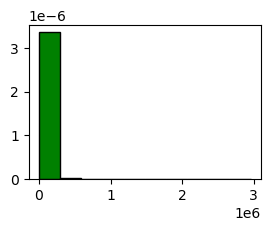

In [560]:
plt.figure(figsize=(3, 2))
plt.hist(df['price'], bins=10, density=True, color='g', edgecolor='black')

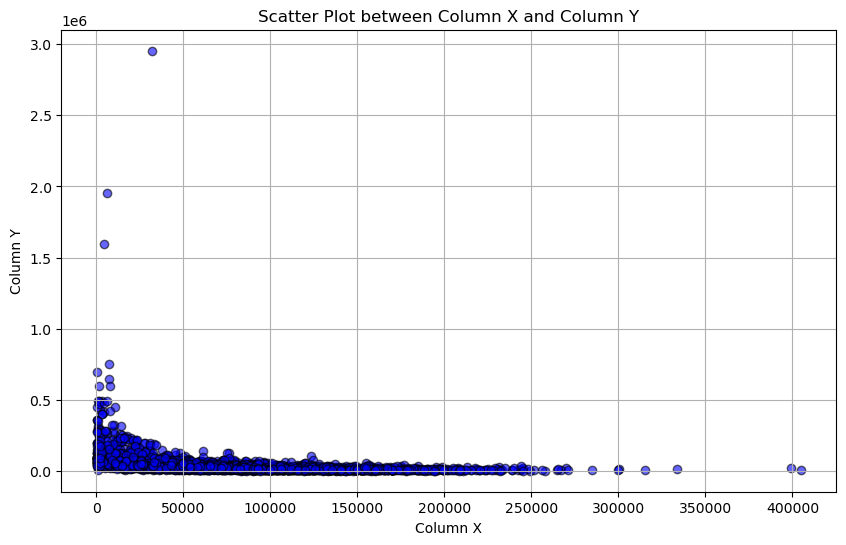

In [562]:
plt.figure(figsize=(10, 6))
plt.scatter( df['milage'],df['price'], color='blue', alpha=0.6, edgecolor='black')
plt.title('Scatter Plot between Column X and Column Y')
plt.xlabel('Column X')
plt.ylabel('Column Y')
plt.grid(True)
plt.show()

In [350]:
(df['price']/1e3).describe()

count    4009.000000
mean       44.553190
std        78.710636
min         2.000000
25%        17.200000
50%        31.000000
75%        49.990000
max      2954.083000
Name: price, dtype: float64

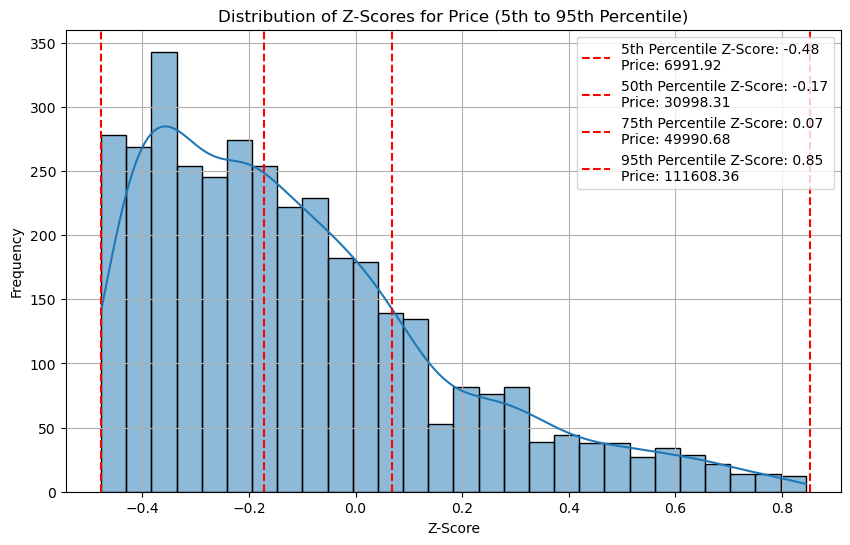

In [564]:
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the z-scores for the 'price' column
df['price_z'] = stats.zscore(df['price'])

# Calculate the 5th, 50th, 75th, and 95th percentiles of z-scores
percentiles = [5, 50, 75, 95]
percentile_z_values = np.percentile(df['price_z'], percentiles)

# Calculate the corresponding price values for each z-score
mean_price = df['price'].mean()
std_price = df['price'].std()
percentile_price_values = mean_price + percentile_z_values * std_price

# Filter data within the 5th and 95th percentiles of z-scores
lower_bound, upper_bound = percentile_z_values[0], percentile_z_values[-1]
filtered_data = df[(df['price_z'] >= lower_bound) & (df['price_z'] <= upper_bound)]

# Plot the filtered distribution of z-scores
plt.figure(figsize=(10, 6))
sns.histplot(filtered_data['price_z'], kde=True)  # kde=True adds the density curve
plt.title('Distribution of Z-Scores for Price (5th to 95th Percentile)')
plt.xlabel('Z-Score')
plt.ylabel('Frequency')
plt.grid(True)

9# Add vertical lines for each selected percentile and annotate with price values
for p, z_value, price_value in zip(percentiles, percentile_z_values, percentile_price_values):
    plt.axvline(z_value, color='red', linestyle='--', label=f'{p}th Percentile Z-Score: {z_value:.2f}\nPrice: {price_value:.2f}')

# Display the legend
plt.legend()
plt.show()


In [352]:
df['engine'].value_counts()

engine
2.0L I4 16V GDI DOHC Turbo                               52
355.0HP 5.3L 8 Cylinder Engine Gasoline Fuel             48
420.0HP 6.2L 8 Cylinder Engine Gasoline Fuel             47
–                                                        45
300.0HP 3.0L Straight 6 Cylinder Engine Gasoline Fuel    44
                                                         ..
323.0HP 6.0L 8 Cylinder Engine Gasoline Fuel              1
405.0HP 4.2L 8 Cylinder Engine Gasoline Fuel              1
353.0HP 6.0L 8 Cylinder Engine Gasoline Fuel              1
275.0HP 4.8L 8 Cylinder Engine Gasoline Fuel              1
420.0HP 5.9L 12 Cylinder Engine Gasoline Fuel             1
Name: count, Length: 1146, dtype: int64

In [566]:
def extract_specs(specs_part):
    parts = specs_part.split()
    horsepower = 0
    liters = 0
    voltage = 0
    version = 0
    cylinders = 0
    vtype = 0

    for i, part in enumerate(parts):
        # Check if 'HP' is in part (e.g., '355.0HP')
        if 'HP' in part:
            try:
                horsepower = float(part.replace('HP', ''))
            except ValueError:
                horsepower = 0
        
        # Check if 'L' or 'Litre' is in part (e.g., '5.3L' or '5.3Litre')
        elif 'L' in part or 'Litre' in part:
            try:
                liters = float(part.replace('L', '').replace('Litre', ''))
            except ValueError:
                liters = 0

        # Check for voltage like '24V' (ending in 'V' with digits before it)
        elif 'V' in part and part[-1] == 'V' and part[:-1].isdigit():
            try:
                voltage = float(part.replace('V', ''))
            except ValueError:
                voltage = 0
        
        # Check for version like 'V6' (starting with 'V' and digits after)
        elif 'V' in part and part[0] == 'V' and part[1:].isdigit():
            try:
                version = float(part.replace('V', ''))
            except ValueError:
                version = 0
        
        # Check for 'Cylinder' in the next position (e.g., '8 Cylinder')
        elif part.isdigit() and i < len(parts) - 1 and parts[i + 1].lower() == 'cylinder':
            cylinders = int(part)
        
        # Check for I-type engines
        elif 'I' in part and part[0] == 'I' and part[1:].isdigit():
            try:
                vtype = float(part.replace('I', ''))
            except ValueError:
                vtype = 0

    return horsepower, liters, voltage, version, cylinders, vtype

# Apply the function to the 'engine' column and create new columns
df[['Horsepower', 'Liters', 'Voltage', 'Version', 'Cylinders', 'V_type']] = df['engine'].apply(lambda x: pd.Series(extract_specs(x)))

# Fill NaN with 0
df.fillna(0, inplace=True)



,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,...,model_col,gear_number,transmission_type,price_z,Horsepower,Liters,Voltage,Version,Cylinders,V_type
0,Ford,Utility Police Interceptor Base,2013,51000,E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,...,other,6,auto,-0.435233,300.0,3.7,0.0,6.0,0.0,0.0
1,Hyundai,Palisade SEL,2021,34742,Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,other,Gray,At least 1 accident or damage reported,...,other,8,auto,-0.083204,0.0,3.8,24.0,6.0,0.0,0.0
2,Lexus,RX 350 RX 350,2022,22372,Gasoline,3.5 Liter DOHC,Automatic,Blue,Black,None reported,...,other,0,auto,0.127633,0.0,0.0,0.0,0.0,0.0,0.0
3,INFINITI,Q50 Hybrid Sport,2015,88900,Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,Black,Black,None reported,...,other,7,auto,-0.369160,354.0,3.5,0.0,6.0,0.0,0.0
4,Audi,Q3 45 S line Premium Plus,2021,9835,Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,other,Black,None reported,...,other,8,auto,-0.121399,0.0,2.0,16.0,0.0,0.0,4.0
5,Acura,ILX 2.4L,2016,136397,Gasoline,2.4 Liter,F,Silver,others,None reported,...,other,0,auto,-0.378080,0.0,0.0,0.0,0.0,0.0,0.0
6,Audi,S3 2.0T Premium Plus,2017,84000,Gasoline,292.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,6-Speed A/T,Blue,Black,None reported,...,other,6,auto,-0.172212,292.0,2.0,0.0,0.0,4.0,0.0
7,BMW,740 iL,2001,242000,Gasoline,282.0HP 4.4L 8 Cylinder Engine Gasoline Fuel,A/T,Green,others,None reported,...,other,0,auto,-0.473352,282.0,4.4,0.0,0.0,8.0,0.0
8,Lexus,RC 350 F Sport,2021,23436,Gasoline,311.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,6-Speed A/T,Black,Black,None reported,...,other,6,auto,-0.033369,311.0,3.5,0.0,6.0,0.0,0.0
9,Tesla,Model X Long Range Plus,2020,34000,Gasoline,534.0HP Electric Motor Electric Fuel System,A/T,Black,Black,None reported,...,other,0,auto,0.322701,534.0,0.0,0.0,0.0,0.0,0.0


In [594]:
# Display the resulting DataFrame
df.drop(columns='price_z')

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,...,brand_col,model_col,gear_number,transmission_type,Horsepower,Liters,Voltage,Version,Cylinders,V_type
0,Ford,Utility Police Interceptor Base,2013,51000,E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,...,Ford,other,6,auto,300.0,3.7,0.0,6.0,0.0,0.0
1,Hyundai,Palisade SEL,2021,34742,Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,other,Gray,At least 1 accident or damage reported,...,Hyundai,other,8,auto,0.0,3.8,24.0,6.0,0.0,0.0
2,Lexus,RX 350 RX 350,2022,22372,Gasoline,3.5 Liter DOHC,Automatic,Blue,Black,None reported,...,Lexus,other,0,auto,0.0,0.0,0.0,0.0,0.0,0.0
3,INFINITI,Q50 Hybrid Sport,2015,88900,Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,Black,Black,None reported,...,INFINITI,other,7,auto,354.0,3.5,0.0,6.0,0.0,0.0
4,Audi,Q3 45 S line Premium Plus,2021,9835,Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,other,Black,None reported,...,Audi,other,8,auto,0.0,2.0,16.0,0.0,0.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4004,Bentley,Continental GT Speed,2023,714,Gasoline,6.0L W12 48V PDI DOHC Twin Turbo,8-Speed Automatic with Auto-Shift,other,others,None reported,...,Bentley,other,8,auto,0.0,6.0,48.0,0.0,0.0,0.0
4005,Audi,S4 3.0T Premium Plus,2022,10900,Gasoline,349.0HP 3.0L V6 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Black,None reported,...,Audi,other,0,dual,349.0,3.0,0.0,6.0,0.0,0.0
4006,Porsche,Taycan,2022,2116,Gasoline,Electric,Automatic,Black,Black,None reported,...,Porsche,other,0,auto,0.0,0.0,0.0,0.0,0.0,0.0
4007,Ford,F-150 Raptor,2020,33000,Gasoline,450.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,A/T,Blue,Black,None reported,...,Ford,other,0,auto,450.0,3.5,0.0,6.0,0.0,0.0


In [618]:
dx=df[['brand_col','model_col','gear_number','transmission_type','accident','milage','fuel_type','model_year',
       'Horsepower','Liters','Voltage','Version','Cylinders','V_type','ext_col','int_col','price']]

In [612]:
numeric_cols = ['gear_number','Horsepower','milage','model_year','Liters','Voltage','Version','Cylinders','V_type']

In [ ]:
category_cols = ['brand_col','model_col','ext_col','int_col','transmission_type']

In [620]:
X_dx = dx.drop(columns=['price'])

In [624]:
Y_dx = dx['price']

In [638]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3207 entries, 2473 to 3174
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   brand_col          3207 non-null   object 
 1   model_col          3207 non-null   object 
 2   gear_number        3207 non-null   int64  
 3   transmission_type  3207 non-null   object 
 4   accident           3207 non-null   object 
 5   milage             3207 non-null   int64  
 6   fuel_type          3207 non-null   object 
 7   model_year         3207 non-null   int64  
 8   Horsepower         3207 non-null   float64
 9   Liters             3207 non-null   float64
 10  Voltage            3207 non-null   float64
 11  Version            3207 non-null   float64
 12  Cylinders          3207 non-null   float64
 13  V_type             3207 non-null   float64
 14  ext_col            3207 non-null   object 
 15  int_col            3207 non-null   object 
dtypes: float64(6), int64(3), o

In [656]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

X_train,X_test,y_train,y_test = train_test_split(X_dx,Y_dx, test_size=0.2,random_state=42)
scaler =StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[numeric_cols])
X_test_scaled =  scaler.transform(X_test[numeric_cols])

In [650]:
df['fuel_type'].value_counts()

fuel_type
Gasoline          3495
Hybrid             205
E85 Flex Fuel      152
Diesel             121
Plug-In Hybrid      36
Name: count, dtype: int64

In [ ]:
ordinal_columns = ['fuel_type','accident']

In [672]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder

numeric_cols = ['gear_number','Horsepower','milage','model_year','Liters','Voltage','Version','Cylinders','V_type']
category_cols = ['brand_col','model_col','ext_col','int_col','transmission_type']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_cols),  # Remove square brackets around numeric_cols
        ('ord', OrdinalEncoder(categories=[
            ['None reported', 'At least 1 accident or damage reported'],
            ['Gasoline', 'Diesel', 'Hybrid', 'E85 Flex Fuel', 'Plug-In Hybrid']
        ]), ['accident', 'fuel_type']),  # Remove extra bracket
        ('cat', OneHotEncoder(drop='first'), category_cols)  # Remove square brackets around category_cols
    ]
)

# Apply the transformations
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

In [674]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

model = LinearRegression()
model.fit(X_train_processed,y_train)
y_test_pred=model.predict(X_test_processed)
y_train_pred=model.predict(X_train_processed)

train_mse= mean_squared_error(y_train,y_train_pred)
train_r2=r2_score(y_train,y_train_pred)

test_mse= mean_squared_error(y_test,y_test_pred)
test_r2= r2_score(y_test,y_test_pred)

print(f"Training Mean Squared Error: {train_mse:.2f}")
print(f"Training R^2 Score: {train_r2:.2f}")
print(f"Test Mean Squared Error: {test_mse:.2f}")
print(f"Test R^2 Score: {test_r2:.2f}")

Training Mean Squared Error: 1193191969.31
Training R^2 Score: 0.54
Test Mean Squared Error: 18176206464.94
Test R^2 Score: 0.11


In [680]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Initialize the Random Forest Regressor
rf_model = RandomForestRegressor(random_state=42)

# Set up GridSearchCV with cross-validation
grid_search = GridSearchCV(
    estimator=rf_model,
    param_grid=param_grid,
    cv=5,  # 5-fold cross-validation
    n_jobs=-1,  # Use all available cores
    scoring='neg_mean_squared_error',  # Use MSE as evaluation metric
    verbose=2
)

# Fit the GridSearchCV on the training data
grid_search.fit(X_train_processed, y_train)

# Get the best parameters and model
best_params = grid_search.best_params_
best_rf_model = grid_search.best_estimator_

print(f"Best Parameters: {best_params}")


Fitting 5 folds for each of 324 candidates, totalling 1620 fits


C:\Users\Shreyam\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
540 fits failed out of a total of 1620.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
359 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Shreyam\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Shreyam\anaconda3\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "C:\Users\Shreyam\anaconda3\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\Shreyam\anaconda3\Lib\

Best Parameters: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
